# Pinocchio Example

This notebook demonstrates basic usage of the Pinocchio library for robot kinematics and dynamics.

In [2]:
import pinocchio as pin
import numpy as np
import matplotlib.pyplot as plt

# Set up matplotlib for notebook display
%matplotlib inline

## Create a Simple Robot Model

Let's create a simple 2D robot with two revolute joints.

In [3]:
# Create a model
model = pin.Model()

# Create a joint configuration
model.addJoint(0, pin.JointModelRX(), pin.SE3.Identity(), "joint1")
model.addJoint(1, pin.JointModelRX(), pin.SE3(np.eye(3), np.array([1.0, 0.0, 0.0])), "joint2")

# Add a frame to the end-effector
model.addFrame(pin.Frame("end_effector", 1, 0, pin.SE3(np.eye(3), np.array([1.0, 0.0, 0.0])), pin.FrameType.OP_FRAME))

# Create data structures
data = model.createData()

# Print model information
print("Number of joints:", model.njoints)
print("Number of frames:", model.nframes)

Number of joints: 3
Number of frames: 2


## Forward Kinematics Example

In [4]:
# Create a configuration vector
q = pin.neutral(model)
q[0] = np.pi/4  # Set first joint to 45 degrees
q[1] = -np.pi/4  # Set second joint to -45 degrees

# Compute forward kinematics
pin.forwardKinematics(model, data, q)
pin.updateFramePlacements(model, data)

# Get end-effector position
end_effector_pose = data.oMf[model.getFrameId("end_effector")]
print("End-effector position:", end_effector_pose.translation)
print("End-effector orientation:", end_effector_pose.rotation)

End-effector position: [1. 0. 0.]
End-effector orientation: [[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


## Visualize Robot Configuration

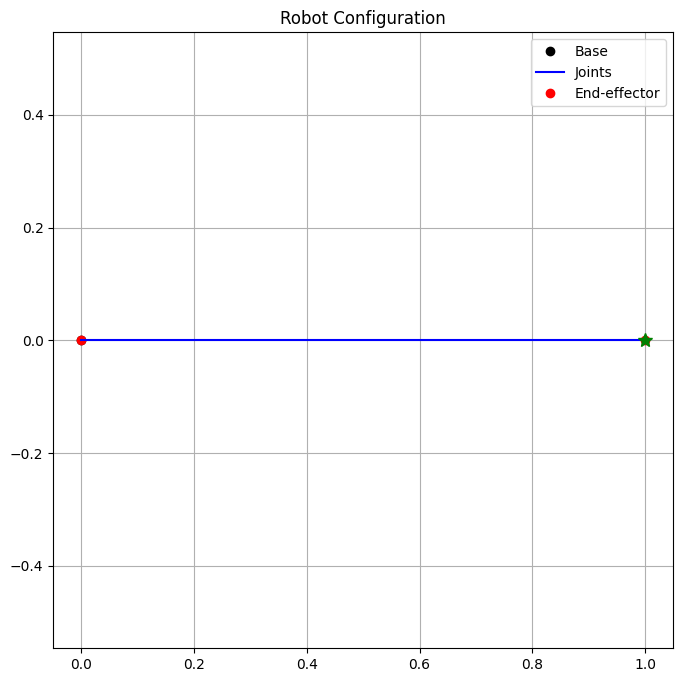

In [5]:
def plot_robot(model, data, q):
    plt.figure(figsize=(8, 8))
    
    # Compute forward kinematics
    pin.forwardKinematics(model, data, q)
    pin.updateFramePlacements(model, data)
    
    # Plot base
    plt.plot([0], [0], 'ko', label='Base')
    
    # Plot joints and links
    for i in range(1, model.njoints):
        joint_pose = data.oMi[i]
        prev_joint_pose = data.oMi[i-1]
        
        plt.plot([prev_joint_pose.translation[0], joint_pose.translation[0]],
                 [prev_joint_pose.translation[1], joint_pose.translation[1]],
                 'b-')
        plt.plot(joint_pose.translation[0], joint_pose.translation[1], 'ro')
    
    # Plot end-effector
    end_effector_pose = data.oMf[model.getFrameId("end_effector")]
    plt.plot(end_effector_pose.translation[0], end_effector_pose.translation[1], 'g*', markersize=10)
    
    plt.grid(True)
    plt.axis('equal')
    plt.title('Robot Configuration')
    plt.legend(['Base', 'Joints', 'End-effector'])
    plt.show()

# Plot the current configuration
plot_robot(model, data, q)